## Importing the required libraries

Detailed Workflow will be provided in "Detailed Workflow" file.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [5]:
df = pd.read_csv("Dataset/Mall_Customers.csv")

In [17]:
df.shape

(200, 5)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [19]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Determining Outliers

An outlier is a data point that is significantly different from the other data points. It may cause severe statistical problems during the analysis.
<br> Hence it is <b>required</b> to clean the data if such thing exists.

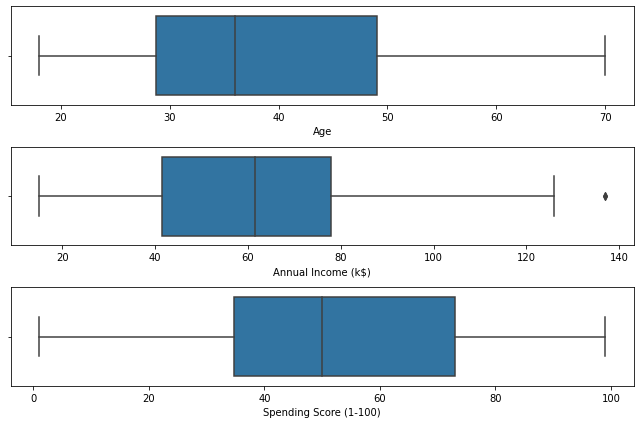

In [20]:
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (9,6))
sns.boxplot(ax = ax[0], x = 'Age', data = df)
sns.boxplot(ax = ax[1], x = 'Annual Income (k$)', data = df)
sns.boxplot(ax = ax[2], x = 'Spending Score (1-100)', data = df)
fig.tight_layout()

In [21]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Counting Gender Ratio by Visits

<AxesSubplot:xlabel='Gender', ylabel='count'>

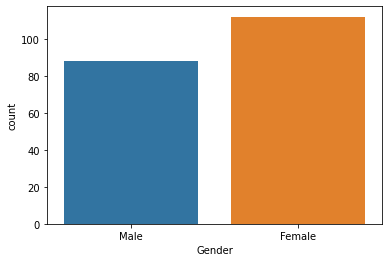

In [23]:
sns.countplot(x = 'Gender', data = df)

### Finding the correlation between the customer's annual income with their spending score

In [28]:
X = df.iloc[:,3:5].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [29]:
# Identifying the number of clusters using elbow graph

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

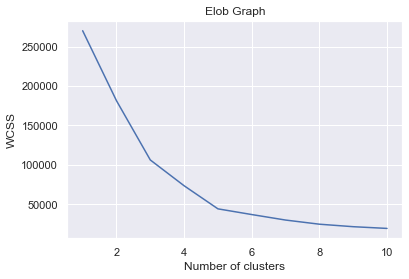

In [30]:
# Using the Elbow method

sns.set()
plt.plot(range(1,11), wcss)
plt.title("Elob Graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

Trainning the model

In [31]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 7)
Y = kmeans.fit_predict(X)

Text(0, 0.5, 'Spending Score')

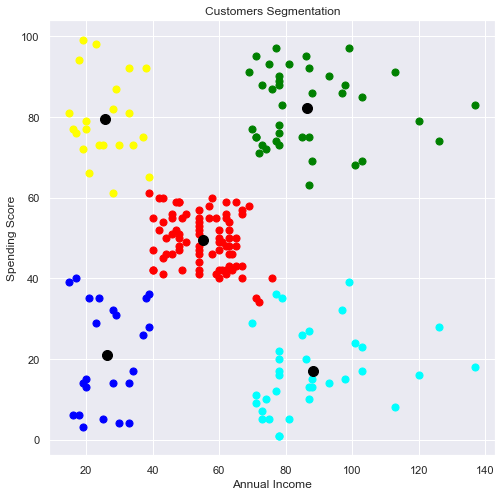

In [32]:
plt.figure(figsize = (8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s = 50, c = 'green', label = 'cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s = 50, c = 'blue', label = 'cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s = 50, c = 'red', label = 'cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s = 50, c = 'yellow', label = 'cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s = 50, c = 'cyan', label = 'cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = "Centroids")

plt.title("Customers Segmentation")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")